# Introduction

The dataset chosen is the Cifar-10. The problem for Cifar-10 is that it has a multiclass, image classification problem. The dataset allows the user to predict or guess which image is which animal. The dataset consists of 60000 coloured images by 32  32 pixels in the 3 channels of red, blue and green, and then further split to 10 classes. Each class possess 6000 images. The training set for this has 50000 images while test sets provided are 10000. The challenge of this dataset is to be able to recognize previously unseen images and assign them to each of the 10 classes.The measure of success for the problem of this project will be accuracy. More precisely, how accurately the model can classify the an image of a cat and dog. Based on this measure, loss function has been chosen. 


In [1]:
!pip install tensorflow 
!pip install tfds-nightly
!pip install keras
!pip install keras.utils

# Methodology

## Preparing the data

In [48]:
import keras
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#load the data
(x_train_input, y_train_input), (x_test_input,y_test_input) = datasets.cifar10.load_data()

image_classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

#the following shows information for the cifar10 dataset, split apart into train and test sets
print("x_train_input shape: ", x_train_input.shape)
print("y_train_input shape: ", y_train_input.shape)
print("Samples to Train: ",x_train_input.shape[0])
print("Samples to Test: ", x_test_input.shape[0])

x_train_input shape:  (50000, 32, 32, 3)
y_train_input shape:  (50000, 1)
Samples to Train:  50000
Samples to Test:  10000


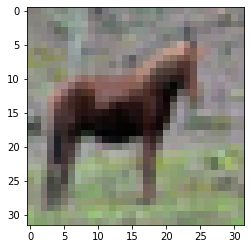

In [3]:
#shows a random image chosen to show as sample
random_image = np.random.choice(x_train_input.shape[0])
image_chosen = x_train_input[random_image,:,:]
plt.imshow(image_chosen)
plt.show()


In [4]:
#We normalize the data first to float for computation purposes
from tensorflow.keras.utils import to_categorical

x_train_input = x_train_input.reshape((50000, 32 * 32* 3))
x_train_input = x_train_input.astype("float32")/ 255
x_test_input = x_test_input.reshape((10000, 32 * 32* 3))
x_test_input = x_test_input.astype("float32")/ 255

#this is the one hot encoding for target values
y_train_input = tf.keras.utils.to_categorical(y_train_input)
y_test_input = tf.keras.utils.to_categorical(y_test_input)

### Underfit Model

In [5]:
#Develop a first underfitting model with statistical power
model_ann = models.Sequential()
model_ann.add(layers.Dense(10, activation='relu', input_shape = (32*32*3,)))
model_ann.add(layers.Dense(10, activation='relu'))
model_ann.add(layers.Dense(10, activation='softmax'))
model_ann.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_history_1 = model_ann.fit(x_train_input,
                                y_train_input,
                                epochs = 50,
                                batch_size = 512,
                                validation_split=0.2)



Epoch 1/50
79/79 [==============================] - 1s 5ms/step - loss: 2.2413 - accuracy: 0.1434 - val_loss: 2.2177 - val_accuracy: 0.1264
Epoch 2/50
79/79 [==============================] - 0s 3ms/step - loss: 2.1341 - accuracy: 0.1869 - val_loss: 2.1546 - val_accuracy: 0.1839
Epoch 3/50
79/79 [==============================] - 0s 3ms/step - loss: 2.0855 - accuracy: 0.2268 - val_loss: 2.2213 - val_accuracy: 0.1640
Epoch 4/50
79/79 [==============================] - 0s 3ms/step - loss: 2.0476 - accuracy: 0.2517 - val_loss: 2.0956 - val_accuracy: 0.2201
Epoch 5/50
79/79 [==============================] - 0s 4ms/step - loss: 2.0198 - accuracy: 0.2613 - val_loss: 2.0187 - val_accuracy: 0.2512
Epoch 6/50
79/79 [==============================] - 0s 3ms/step - loss: 1.9950 - accuracy: 0.2726 - val_loss: 2.1079 - val_accuracy: 0.2304
Epoch 7/50
79/79 [==============================] - 0s 3ms/step - loss: 1.9758 - accuracy: 0.2761 - val_loss: 1.9651 - val_accuracy: 0.2827
Epoch 8/50
79/79 [==

In [7]:
#Develop a larger overfitting model
model_ann = models.Sequential()
model_ann.add(layers.Dense(2000, activation='relu', input_shape = (32*32*3,)))
model_ann.add(layers.Dense(2000, activation='relu'))
model_ann.add(layers.Dense(2000, activation='relu'))
model_ann.add(layers.Dense(10, activation='softmax'))
model_ann.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_history_2 = model_ann.fit(x_train_input,
                                y_train_input,
                                epochs = 50,
                                batch_size = 512,
                                validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 10s 126ms/step - loss: 4.6806 - accuracy: 0.1549 - val_loss: 2.1595 - val_accuracy: 0.2072
Epoch 2/50
79/79 [==============================] - 9s 120ms/step - loss: 2.1902 - accuracy: 0.2005 - val_loss: 2.2886 - val_accuracy: 0.1559
Epoch 3/50
79/79 [==============================] - 9s 119ms/step - loss: 2.0916 - accuracy: 0.2366 - val_loss: 2.8060 - val_accuracy: 0.1603
Epoch 4/50
79/79 [==============================] - 9s 120ms/step - loss: 1.9846 - accuracy: 0.2821 - val_loss: 2.1761 - val_accuracy: 0.2427
Epoch 5/50
79/79 [==============================] - 9s 120ms/step - loss: 1.9178 - accuracy: 0.3115 - val_loss: 1.9483 - val_accuracy: 0.2836
Epoch 6/50
79/79 [==============================] - 10s 123ms/step - loss: 1.8599 - accuracy: 0.3298 - val_loss: 1.9112 - val_accuracy: 0.2999
Epoch 7/50
79/79 [==============================] - 10s 124ms/step - loss: 1.8149 - accuracy: 0.3485 - val_loss: 1.9036 - val_accuracy: 0.3064
Epo

In [24]:
#Regularize overfitting model and tune hyperparameters based on validation performance
model_ann = models.Sequential()
model_ann.add(layers.Dense(750, activation='relu', input_shape = (32*32*3,)))
model_ann.add(layers.Dropout(0.01))
model_ann.add(layers.Dense(750, activation='relu'))
model_ann.add(layers.Dropout(0.01))
model_ann.add(layers.Dense(10, activation='softmax'))

#optimizer for the hyperparameters
opt_chosen = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_ann.compile(optimizer=opt_chosen,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_history_3 = model_ann.fit(x_train_input,
                                y_train_input,
                                epochs = 50,
                                batch_size = 512,
                                validation_split=0.2)

Epoch 1/50
79/79 [==============================] - 2s 23ms/step - loss: 1.9319 - accuracy: 0.3146 - val_loss: 1.8290 - val_accuracy: 0.3452
Epoch 2/50
79/79 [==============================] - 2s 23ms/step - loss: 1.7505 - accuracy: 0.3837 - val_loss: 1.7366 - val_accuracy: 0.3804
Epoch 3/50
79/79 [==============================] - 2s 23ms/step - loss: 1.6720 - accuracy: 0.4130 - val_loss: 1.6692 - val_accuracy: 0.4109
Epoch 4/50
79/79 [==============================] - 2s 23ms/step - loss: 1.6151 - accuracy: 0.4333 - val_loss: 1.6459 - val_accuracy: 0.4200
Epoch 5/50
79/79 [==============================] - 2s 23ms/step - loss: 1.5700 - accuracy: 0.4502 - val_loss: 1.5968 - val_accuracy: 0.4435
Epoch 6/50
79/79 [==============================] - 2s 23ms/step - loss: 1.5299 - accuracy: 0.4661 - val_loss: 1.5767 - val_accuracy: 0.4451
Epoch 7/50
79/79 [==============================] - 2s 24ms/step - loss: 1.4952 - accuracy: 0.4764 - val_loss: 1.5721 - val_accuracy: 0.4485
Epoch 8/50
79

In [26]:
#Retrain on the entire training set and validate on the unseen test set
model_ann = models.Sequential()
model_ann.add(layers.Dense(750, activation='relu', input_shape = (32*32*3,)))
model_ann.add(layers.Dropout(0.01))
model_ann.add(layers.Dense(750, activation='relu'))
model_ann.add(layers.Dropout(0.01))
model_ann.add(layers.Dense(10, activation='softmax'))

opt_chosen = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_ann.compile(optimizer=opt_chosen,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_history_retrain = model_ann.fit(x_train_input,
                                y_train_input,
                                epochs = 50,
                                batch_size = 512)

Epoch 1/50
98/98 [==============================] - 2s 22ms/step - loss: 1.9149 - accuracy: 0.3213
Epoch 2/50
98/98 [==============================] - 2s 22ms/step - loss: 1.7256 - accuracy: 0.3935
Epoch 3/50
98/98 [==============================] - 2s 23ms/step - loss: 1.6385 - accuracy: 0.4272
Epoch 4/50
98/98 [==============================] - 2s 23ms/step - loss: 1.5807 - accuracy: 0.4466
Epoch 5/50
98/98 [==============================] - 2s 22ms/step - loss: 1.5345 - accuracy: 0.4620
Epoch 6/50
98/98 [==============================] - 2s 22ms/step - loss: 1.4978 - accuracy: 0.4752
Epoch 7/50
98/98 [==============================] - 2s 23ms/step - loss: 1.4594 - accuracy: 0.4909
Epoch 8/50
98/98 [==============================] - 2s 23ms/step - loss: 1.4366 - accuracy: 0.4962
Epoch 9/50
98/98 [==============================] - 2s 23ms/step - loss: 1.4044 - accuracy: 0.5078
Epoch 10/50
98/98 [==============================] - 2s 23ms/step - loss: 1.3824 - accuracy: 0.5171
Epoch 11/

In [35]:
#Evaluation for trained model
evaluation_for_model = model_ann.evaluate(x_test_input, y_test_input, verbose=1)
print('Test for Loss:', evaluation_for_model[0])
print('Test for Accuracy:', evaluation_for_model[1])

#Make a prediction for this model
prediction_for_model = model_ann.predict(x_test_input)

313/313 [==============================] - 1s 3ms/step - loss: 1.3171 - accuracy: 0.5516
Test for Loss: 1.317077875137329
Test for Accuracy: 0.5515999794006348


# Results

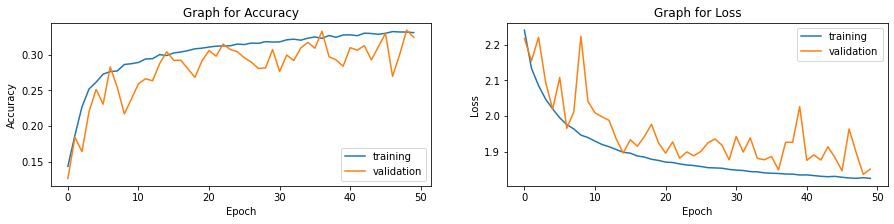

In [49]:
#This is a function that allows me to plot the loss and accuracy of the models
def plotLossAndAccuracy(model_history): 
    fig, xyaxis = plt.subplots(1,2,figsize=(15,3)) 
    #plotting for accuracy
    xyaxis[0].plot(model_history.history['accuracy']) 
    xyaxis[0].plot(model_history.history['val_accuracy']) 
    xyaxis[0].set_title('Graph for Accuracy')
    xyaxis[0].set_ylabel('Accuracy') 
    xyaxis[0].set_xlabel('Epoch')
    xyaxis[0].legend(['training', 'validation'], loc='lower right')
    #plotting for loss
    xyaxis[1].plot(model_history.history['loss']) 
    xyaxis[1].plot(model_history.history['val_loss']) 
    xyaxis[1].set_title('Graph for Loss')
    xyaxis[1].set_ylabel('Loss') 
    xyaxis[1].set_xlabel('Epoch')
    xyaxis[1].legend(['training', 'validation'], loc='upper right')
    plt.show()

    
#plot for underfit model
plotLossAndAccuracy(model_history_1)


#### Underfit Model
The results will be talked about from the first model which is the underfit model to the final retrained model. The validation loss for the first model is moving up and down as if it was like a random function. It shows the accuracies of the validation is low. The training loss is declining at a steady rate and then remains at arbitrary point. The high losses is a natural result for an underfit model.

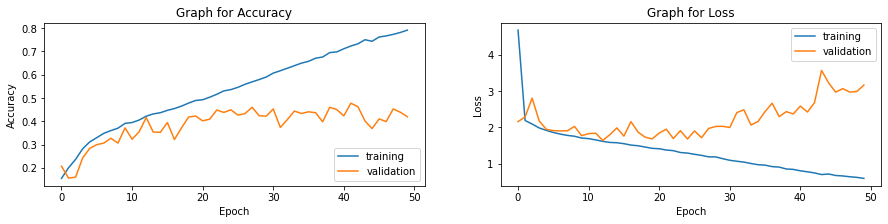

In [50]:
#plot for overfit model
plotLossAndAccuracy(model_history_2)


#### Overfit Model
For the overfit model, the accuracy of the model has gained a significant increase to 79%. This increase is actually shown in the graphs as the distance between is quite large. The training loss is not too bad as compared to the underfit model. But we can see that the training loss is had a huge drop in the beginning and then gradually decreasing across the epoch. 

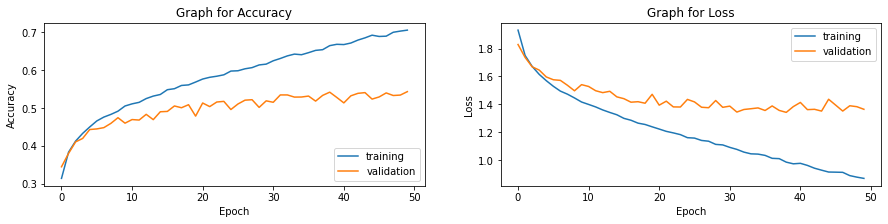

In [51]:
#plot for regularized model
plotLossAndAccuracy(model_history_3)


#### Regularized Overfitting Model
The model above is somewhat similar to the overfitting model. We can see that the training accuracies and training losses are much smoother then the overfit model. The validation accuracy has barely reached the 50% mark, reaching 54%. Goes to show that the performance of the model is somewhat okay and might be considered to be used by researchers. 

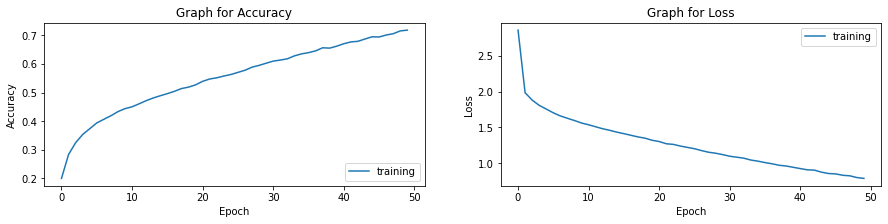

In [52]:
#plot for retrained model, first part is for accuracy
fig, xyaxis = plt.subplots(1,2,figsize=(15,3)) 
xyaxis[0].plot(model_history_retrain.history['accuracy']) 
xyaxis[0].set_title('Graph for Accuracy')
xyaxis[0].set_ylabel('Accuracy') 
xyaxis[0].set_xlabel('Epoch')
xyaxis[0].legend(['training'], loc='lower right')
#plotting for loss
xyaxis[1].plot(model_history_retrain.history['loss']) 
xyaxis[1].set_title('Graph for Loss')
xyaxis[1].set_ylabel('Loss') 
xyaxis[1].set_xlabel('Epoch')
xyaxis[1].legend(['training'], loc='upper right')
plt.show()

#### Retrained Model

The retrained model has managed to reach 55% for accuracy and then slowly increases to a stop. The loss went down a lot from 180% to 80% which in my opinion was alright though I feel it can be better. It was truly challenging to reach a high accuracy for the retrained model.

# Conclusion

I think I did an okay job for this model, it was very difficult to achieve even 50% for this model. I personally am pleased to have reach 55% for the evaluation of this model, personally if I added a bit more layers I think I would done a better job. The hot encoding was tricky as I did not know why it did not upload to me the first time and I was stuck on it for awhile. Same goes to the input_shape for the model building. I find that I should experiment with regularizing the L1 or L2 weights too instead of just dropout. I am pleased to try the Adam optimizer instead of the RMSprop, as the Adam optimizer got me actually got me to 72% accuracy and a lesser loss than RMSprop. I am disappointed that I failed to implement convolution neural network, I kept getting errors along the way so I decided to not put my efforts here.